In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


df = pd.read_csv("china_gdp.csv")
df.head(10)


,Year,Value
0,1960,5.918412e+10
1,1961,4.955705e+10
2,1962,4.668518e+10
3,1963,5.009730e+10
4,1964,5.906225e+10
5,1965,6.970915e+10
6,1966,7.587943e+10
7,1967,7.205703e+10
8,1968,6.999350e+10
9,1969,7.871882e+10


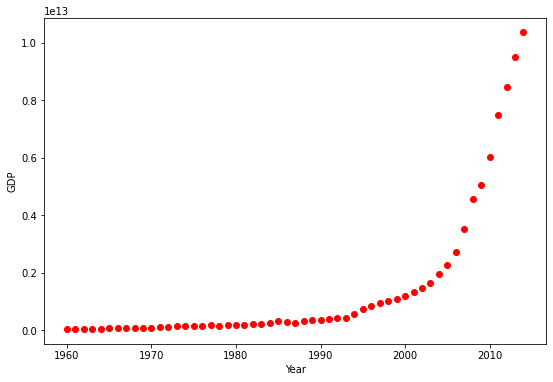

In [3]:
plt.figure(figsize=(9, 6))

x_data, y_data = (df["Year"].values, df["Value"].values)
plt.plot(x_data, y_data, 'ro')
plt.ylabel('GDP')
plt.xlabel('Year')
plt.show()


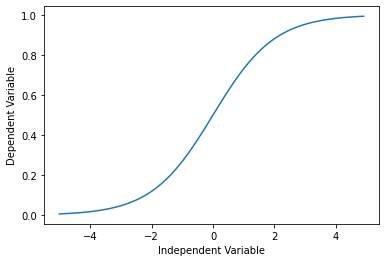

In [4]:
X = np.arange(-5.0, 5.0, 0.1)
Y = 1.0 / (1.0 + np.exp(-X))

plt.plot(X,Y) 
plt.ylabel('Dependent Variable')
plt.xlabel('Independent Variable')
plt.show()

In [5]:
def sigmoid(x, Beta_1, Beta_2):
     y = 1 / (1 + np.exp(-Beta_1*(x-Beta_2)))
     return y

In [6]:
# Wrong!

from scipy.optimize import curve_fit


popt, pcov = curve_fit(sigmoid, x_data, y_data)
print(" beta_1 = %f, beta_2 = %f" % (popt[0], popt[1]))

 beta_1 = 1.000000, beta_2 = 1.000000


C:\Program Files\Python39\lib\site-packages\scipy\optimize\minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


In [7]:
# Normalizing our dara :D

n_x_data = x_data / max(x_data)
n_y_data = y_data / max(y_data)

# My Way


Mean absolute error: 221648835814.28
Residual sum of squares (MSE): 76891752616254412685312.00
R2-score: 0.99


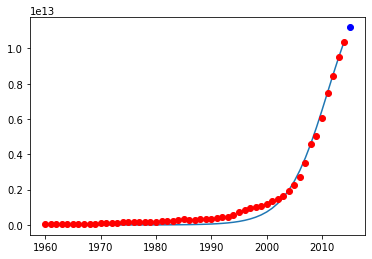

In [10]:
from sklearn.metrics import r2_score



beta_1 = 0.27
beta_2 = 2011
Y_pred = sigmoid(x_data, beta_1 , beta_2)*15000000000000.



print("Mean absolute error: %.2f" % np.mean(np.absolute(Y_pred - y_data)))
print("Residual sum of squares (MSE): %.2f" % np.mean((Y_pred - y_data) ** 2))
print("R2-score: %.2f" % r2_score(y_data, Y_pred))

plt.plot(x_data, Y_pred)
plt.plot(x_data, y_data, 'ro')

plt.plot(2015, sigmoid(2015, beta_1 , beta_2)*15000000000000, 'bo')

In [ ]:
from scipy.optimize import curve_fit


popt, pcov = curve_fit(sigmoid, n_x_data, n_y_data)
print(" beta_1 = %f, beta_2 = %f" % (popt[0], popt[1]))

 beta_1 = 690.451712, beta_2 = 0.997207


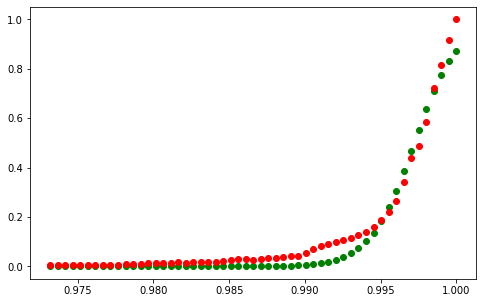

In [ ]:
plt.figure(figsize=(8,5))
beta_1 = popt[0]
beta_2 = popt[1]
#beta_1 = 690.451712
#beta_2 = 0.997207
Y_pred = sigmoid(n_x_data, beta_1 , beta_2)



plt.plot(n_x_data, Y_pred, 'go')
plt.plot(n_x_data, n_y_data, 'ro')


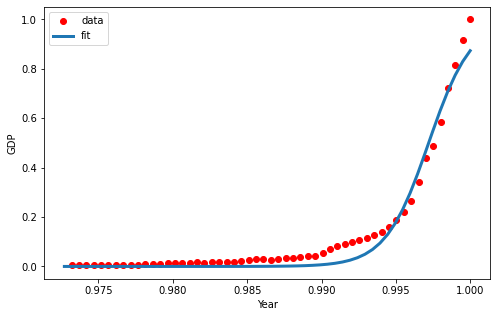

In [ ]:
x = np.linspace(1960, 2015, 55)
x = x/max(x)
plt.figure(figsize=(8,5))
y = sigmoid(x, *popt)
plt.plot(n_x_data, n_y_data, 'ro', label='data')
plt.plot(x,y, linewidth=3.0, label='fit')
plt.legend(loc='best')
plt.ylabel('GDP')
plt.xlabel('Year')
plt.show()

## Jadi Practice!

2015 gdt?

In [ ]:
gpf_2015 = (sigmoid(2015/2014, *popt)) * max(y_data)

print(gpf_2015)

9386251385681.592


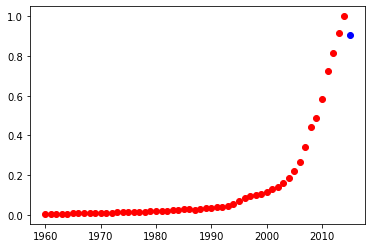

In [ ]:
plt.plot(x_data, n_y_data, 'ro')

plt.plot(2015, sigmoid(2015/2014, *popt), 'bo')

#### Seems so bad :X

### Saeed Aghabozorgi Pracrive!

Can you calculate what is the accuracy of our model?


## Easy way!


[6.27401492e-08 8.83960803e-08 1.24543327e-07 1.75472035e-07
 2.47226690e-07 3.48323506e-07 4.90761169e-07 6.91444899e-07
 9.74192825e-07 1.37256280e-06 1.93383517e-06 2.72462403e-06
 3.83878306e-06 5.40854391e-06 7.62020880e-06 1.07362593e-05
 1.51265036e-05 2.13119575e-05 3.00266601e-05 4.23047534e-05
 5.96031382e-05 8.39742268e-05 1.18309215e-04 1.66680592e-04
 2.34824229e-04 3.30817653e-04 4.66033784e-04 6.56480933e-04
 9.24683307e-04 1.30231578e-03 1.83388692e-03 2.58187054e-03
 3.63382202e-03 5.11218146e-03 7.18764785e-03 1.00971698e-02
 1.41676439e-02 1.98461507e-02 2.77366137e-02 3.86405055e-02
 5.35946732e-02 7.38913914e-02 1.01053893e-01 1.36727201e-01
 1.82437909e-01 2.39196287e-01 3.06982434e-01 3.84275769e-01
 4.67891080e-01 5.53349501e-01 6.35767256e-01 7.10921872e-01
 7.76032183e-01 8.29984539e-01 8.73065987e-01]



[0.0057156  0.00478589 0.00450854 0.00483806 0.00570384 0.00673204
 0.00732793 0.00695878 0.0067595  0.00760213 0.00883705 0.00951846
 0.01083164 0.01320831 

ValueError: continuous is not supported

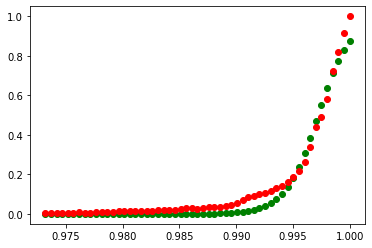

In [ ]:
from sklearn.metrics import accuracy_score
result = sigmoid(n_x_data, beta_1 , beta_2)

"""
print(result)
print('\n\n')
print(n_y_data)
"""

plt.plot(n_x_data, result, 'go')
plt.plot(n_x_data, n_y_data, 'ro')

accuracy_score(result, n_y_data)

Easy way faild :DDDDDDD

## Another way :/ ...

Mean absolute error: 0.03
Residual sum of squares (MSE): 0.00
R2-score: 0.97


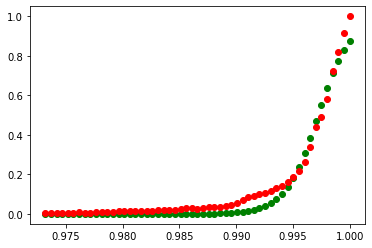

In [ ]:
from sklearn.metrics import r2_score


result = sigmoid(n_x_data, beta_1 , beta_2)


plt.plot(n_x_data, result, 'go')
plt.plot(n_x_data, n_y_data, 'ro')

print("Mean absolute error: %.2f" % np.mean(np.absolute(result - n_y_data)))
print("Residual sum of squares (MSE): %.2f" % np.mean((result - n_y_data) ** 2))
print("R2-score: %.2f" % r2_score(n_y_data,result ))

## R2-score: 0.97   8)))